# Embeddings: Motivation From Collaborative Filtering

**Collaborative filtering** is the task of making predictions about the interests of a user based on interests of many other users. As an example, let's look at the task of movie recommendation. Suppose we have 1,000,000 users, and a list of the movies each user has watched (from a catalog of 500,000 movies). Our goal is to recommend movies to users.

To solve this problem some method is needed to determine which movies are similar to each other. We can achieve this goal by embedding the movies into a low-dimensional space created such that similar movies are nearby.

Before describing how we can learn the embedding, we first explore the type of qualities we want the embedding to have, and how we will represent the training data for learning the embedding.

## Arrange Movies on a One-Dimensional Number Line

To help develop intuition about embeddings, on a piece of paper, try to arrange the following movies on a one-dimensional number line so that the movies nearest each other are the most closely related:

![](img/table.png)

![](img/one-di.png)

## Arrange Movies in a Two-Dimensional Space

Try the same exercise as before, but this time arrange the same movies in a two-dimensional space.

![](img/two-di.png)

## Embeddings: Categorical Input Data

**Categorical data** refers to input features that represent one or more discrete items from a finite set of choices. For example, it can be the set of movies a user has watched, the set of words in a document, or the occupation of a person.

Categorical data is most efficiently represented via **sparse tensors**, which are tensors with **very few non-zero elements**. For example, if we're building a movie recommendation model, we can assign a unique ID to each possible movie, and then represent each user by a sparse tensor of the movies they have watched, as shown in Figure 3.

![](img/data_movie.png)

Each row of the matrix in Figure 3 is an example capturing a user's movie-viewing history, and is represented as a sparse tensor because each user only watches a small fraction of all possible movies. The last row corresponds to the sparse tensor [1, 3, 999999], using the vocabulary indices shown above the movie icons.

Likewise one can represent words, sentences, and documents as sparse vectors where each word in the vocabulary plays a role similar to the movies in our recommendation example.

In order to use such representations within a machine learning system, we need a way to represent each sparse vector as a vector of numbers so that semantically similar items (movies or words) have similar distances in the vector space. But how do you represent a word as a vector of numbers?

The simplest way is to define a giant input layer with a node for every word in your vocabulary, or at least a node for every word that appears in your data. If 500,000 unique words appear in your data, you could represent a word with a length 500,000 vector and assign each word to a slot in the vector.

If you assign "horse" to index 1247, then to feed "horse" into your network you might copy a 1 into the 1247th input node and 0s into all the rest. This sort of representation is called a **one-hot encoding**, because only one index has a non-zero value.

More typically your vector might contain counts of the words in a larger chunk of text. This is known as a "bag of words" representation. In a bag-of-words vector, several of the 500,000 nodes would have non-zero value.

But however you determine the non-zero values, one-node-per-word gives you very sparse input vectors—very large vectors with relatively few non-zero values. Sparse representations have a couple of problems that can make it hard for a model to learn effectively.

## Size of Network

Huge input vectors mean a super-huge number of weights for a neural network. If there are M words in your vocabulary and N nodes in the first layer of the network above the input, you have MxN weights to train for that layer. A large number of weights causes further problems:

- **Amount of data**. The more weights in your model, the more data you need to train effectively.
- **Amount of computation**. The more weights, the more computation required to train and use the model. It's easy to exceed the capabilities of your hardware.

## Lack of Meaningful Relations Between Vectors

If you feed the pixel values of RGB channels into an image classifier, it makes sense to talk about "close" values. Reddish blue is close to pure blue, both semantically and in terms of the geometric distance between vectors. But a vector with a 1 at index 1247 for "horse" is not any closer to a vector with a 1 at index 50,430 for "antelope" than it is to a vector with a 1 at index 238 for "television".

# The Solution: Embeddings

The solution to these problems is to use **embeddings**, which translate large sparse vectors into a lower-dimensional space that preserves semantic relationships. We'll explore embeddings intuitively, conceptually, and programmatically in the following sections of this module.

### Translating to a Lower-Dimensional Space

You can solve the core problems of sparse input data by mapping your high-dimensional data into a lower-dimensional space.

As you can see from the paper exercises, even a small multi-dimensional space provides the freedom to group semantically similar items together and keep dissimilar items far apart. Position (distance and direction) in the vector space can encode semantics in a good embedding. For example, the following visualizations of real embeddings show geometrical relationships that capture semantic relations like the relation between a country and its capital:

![](img/dim.png)

This sort of meaningful space gives your machine learning system opportunities to detect patterns that may help with the learning task.

## Shrinking the network

While we want enough dimensions to encode rich semantic relations, we also want an embedding space that is small enough to allow us to train our system more quickly. A useful embedding may be on the order of hundreds of dimensions. This is likely several orders of magnitude smaller than the size of your vocabulary for a natural language task.

## Embeddings as lookup tables

An embedding is a matrix in which each column is the vector that corresponds to an item in your vocabulary. To get the dense vector for a single vocabulary item, you retrieve the column corresponding to that item.

But how would you translate a sparse bag of words vector? To get the dense vector for a sparse vector representing multiple vocabulary items (all the words in a sentence or paragraph, for example), you could retrieve the embedding for each individual item and then add them together.

If the sparse vector contains counts of the vocabulary items, you could multiply each embedding by the count of its corresponding item before adding it to the sum.

These operations may look familiar.

## Embedding lookup as matrix multiplication

The lookup, multiplication, and addition procedure we've just described is equivalent to matrix multiplication. Given a 1 X N sparse representation S and an N X M embedding table E, the matrix multiplication S X E gives you the 1 X M dense vector.

But how do you get E in the first place? We'll take a look at how to obtain embeddings in the next section.

# Obtaining Embeddings

## Standard Dimensionality Reduction Techniques

There are many existing mathematical techniques for capturing the important structure of a high-dimensional space in a low dimensional space. In theory, any of these techniques could be used to create an embedding for a machine learning system.

For example, [principal component analysis](https://wikipedia.org/wiki/Principal_component_analysis) (PCA) has been used to create word embeddings. Given a set of instances like bag of words vectors, PCA tries to find highly correlated dimensions that can be collapsed into a single dimension.

## Word2vec

Word2vec is an algorithm invented at Google for training word embeddings. Word2vec relies on the **distributional hypothesis** to map semantically similar words to geometrically close embedding vectors.

The distributional hypothesis states that words which often have the same neighboring words tend to be semantically similar. Both "dog" and "cat" frequently appear close to the word "vet", and this fact reflects their semantic similarity. As the linguist John Firth put it in 1957, "You shall know a word by the company it keeps".

Word2Vec exploits contextual information like this by training a neural net to distinguish actually co-occurring groups of words from randomly grouped words. The input layer takes a sparse representation of a target word together with one or more context words. This input connects to a single, smaller hidden layer.

In one version of the algorithm, the system makes a negative example by substituting a random noise word for the target word. Given the positive example "the plane flies", the system might swap in "jogging" to create the contrasting negative example "the jogging flies".

The other version of the algorithm creates negative examples by pairing the true target word with randomly chosen context words. So it might take the positive examples (the, plane), (flies, plane) and the negative examples (compiled, plane), (who, plane) and learn to identify which pairs actually appeared together in text.

The classifier is not the real goal for either version of the system, however. After the model has been trained, you have an embedding. You can use the weights connecting the input layer with the hidden layer to map sparse representations of words to smaller vectors. This embedding can be reused in other classifiers.

For more information about word2vec, see the [tutorial on tensorflow.org](https://www.tensorflow.org/tutorials/representation/word2vec)

## Training an Embedding as Part of a Larger Model

You can also learn an **embedding as part of the neural network** for your target task. This approach gets you an embedding well customized for your particular system, but may take longer than training the embedding separately.

In general, when you have sparse data (or dense data that you'd like to embed), you can create an embedding unit that is just a special type of hidden unit of size $d$. This embedding layer can be combined with any other features and hidden layers. As in any DNN, the final layer will be the loss that is being optimized. 

For example, let's say we're performing collaborative filtering, where the goal is to predict a user's interests from the interests of other users. We can model this as a supervised learning problem by randomly setting aside (or holding out) a small number of the movies that the user has watched as the positive labels, and then optimize a softmax loss.

![](img/embed.png)

As another example if you want to create an embedding layer for the words in a real-estate ad as part of a DNN to predict housing prices then you'd optimize an L2 Loss using the known sale price of homes in your training data as the label.

When learning a d-dimensional embedding each item is mapped to a point in a d-dimensional space so that the similar items are nearby in this space. Figure 6 helps to illustrate the relationship between the weights learned in the embedding layer and the geometric view. The edge weights between an input node and the nodes in the d-dimensional embedding layer correspond to the coordinate values for each of the d axes.

![](img/embed2.png)

# Example

**Learning Objectives:**
* Convert movie-review string data to a sparse feature vector
* Implement a sentiment-analysis linear model using a sparse feature vector
* Implement a sentiment-analysis DNN model using an embedding that projects data into two dimensions
* Visualize the embedding to see what the model has learned about the relationships between words

## Setup

Let's import our dependencies and download the training and test data. [`tf.keras`](https://www.tensorflow.org/api_docs/python/tf/keras) includes a file download and caching tool that we can use to retrieve the data sets.

In [1]:
from __future__ import print_function

import collections
import io
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython import display
from sklearn import metrics

tf.logging.set_verbosity(tf.logging.ERROR)
train_url = 'https://storage.googleapis.com/mledu-datasets/sparse-data-embedding/train.tfrecord'
train_path = tf.keras.utils.get_file(train_url.split('/')[-1], train_url)
test_url = 'https://storage.googleapis.com/mledu-datasets/sparse-data-embedding/test.tfrecord'
test_path = tf.keras.utils.get_file(test_url.split('/')[-1], test_url)

40689664/40688441 [==============================] - 38s 1us/step


## Building a Sentiment Analysis Model
Let's train a sentiment-analysis model on this data that predicts if a review is generally *favorable* (label of 1) or *unfavorable* (label of 0).

To do so, we'll turn our string-value `terms` into feature vectors by using a *vocabulary*, a list of each term we expect to see in our data. For the purposes of this exercise, we've created a small vocabulary that focuses on a limited set of terms. Most of these terms were found to be strongly indicative of *favorable* or *unfavorable*, but some were just added because they're interesting.

Each term in the vocabulary is mapped to a coordinate in our feature vector. To convert the string-value `terms` for an example into this vector format, we encode such that each coordinate gets a value of 0 if the vocabulary term does not appear in the example string, and a value of 1 if it does. Terms in an example that don't appear in the vocabulary are thrown away.

**NOTE:** *We could of course use a larger vocabulary, and there are special tools for creating these. In addition, instead of just dropping terms that are not in the vocabulary, we can introduce a small number of OOV (out-of-vocabulary) buckets to which you can hash the terms not in the vocabulary. We can also use a __feature hashing__ approach that hashes each term, instead of creating an explicit vocabulary. This works well in practice, but loses interpretability, which is useful for this exercise. See see the tf.feature_column module for tools handling this.*

## Building the Input Pipeline

First, let's configure the input pipeline to import our data into a TensorFlow model. We can use the following function to parse the training and test data (which is in [TFRecord](https://www.tensorflow.org/programmers_guide/datasets) format) and return a dict of the features and the corresponding labels.

In [3]:
def _parse_function(record):
    """Extracts features and labels.

    Args:
    record: File path to a TFRecord file    
    Returns:
    A `tuple` `(labels, features)`:
      features: A dict of tensors representing the features
      labels: A tensor with the corresponding labels.
    """
    features = {
    "terms": tf.VarLenFeature(dtype=tf.string), # terms are strings of varying lengths
    "labels": tf.FixedLenFeature(shape=[1], dtype=tf.float32) # labels are 0 or 1
    }

    parsed_features = tf.parse_single_example(record, features)

    terms = parsed_features['terms'].values
    labels = parsed_features['labels']

    return  {'terms':terms}, labels

To confirm our function is working as expected, let's construct a `TFRecordDataset` for the training data, and map the data to features and labels using the function above.

In [6]:
# Create the Dataset object.
ds = tf.data.TFRecordDataset(train_path)
# Map features and labels with the parse function.
ds = ds.map(_parse_function)
ds

<MapDataset shapes: ({terms: (?,)}, (1,)), types: ({terms: tf.string}, tf.float32)>

Run the following cell to retrieve the first example from the training data set.

In [7]:
n = ds.make_one_shot_iterator().get_next()
sess = tf.Session()
sess.run(n)

({'terms': array([b'but', b'it', b'does', b'have', b'some', b'good', b'action',
         b'and', b'a', b'plot', b'that', b'is', b'somewhat', b'interesting',
         b'.', b'nevsky', b'acts', b'like', b'a', b'body', b'builder',
         b'and', b'he', b'isn', b"'", b't', b'all', b'that', b'attractive',
         b',', b'in', b'fact', b',', b'imo', b',', b'he', b'is', b'ugly',
         b'.', b'(', b'his', b'acting', b'skills', b'lack', b'everything',
         b'!', b')', b'sascha', b'is', b'played', b'very', b'well', b'by',
         b'joanna', b'pacula', b',', b'but', b'she', b'needed', b'more',
         b'lines', b'than', b'she', b'was', b'given', b',', b'her',
         b'character', b'needed', b'to', b'be', b'developed', b'.',
         b'there', b'are', b'way', b'too', b'many', b'men', b'in', b'this',
         b'story', b',', b'there', b'is', b'zero', b'romance', b',', b'too',
         b'much', b'action', b',', b'and', b'way', b'too', b'dumb', b'of',
         b'an', b'ending', b'.', b'

Now, let's build a formal input function that we can pass to the `train()` method of a TensorFlow Estimator object.

In [9]:
# Create an input_fn that parses the tf.Examples from the given files,
# and split them into features and targets.
def _input_fn(input_filenames, num_epochs=None, shuffle=True):
    # Same code as above; create a dataset and map features and labels.
    ds = tf.data.TFRecordDataset(input_filenames)
    ds = ds.map(_parse_function)

    if shuffle:
        ds = ds.shuffle(10000)

    # Our feature data is variable-length, so we pad and batch
    # each field of the dataset structure to whatever size is necessary.
    ds = ds.padded_batch(25, ds.output_shapes)
    ds = ds.repeat(num_epochs)

    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

## Task 1: Use a Linear Model with Sparse Inputs and an Explicit Vocabulary

For our first model, we'll build a [`LinearClassifier`](https://www.tensorflow.org/api_docs/python/tf/estimator/LinearClassifier) model using 50 informative terms; always start simple!

The following code constructs the feature column for our terms. The [`categorical_column_with_vocabulary_list`](https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list) function creates a feature column with the string-to-feature-vector mapping.

In [10]:
# 50 informative terms that compose our model vocabulary 
informative_terms = ("bad", "great", "best", "worst", "fun", "beautiful",
                     "excellent", "poor", "boring", "awful", "terrible",
                     "definitely", "perfect", "liked", "worse", "waste",
                     "entertaining", "loved", "unfortunately", "amazing",
                     "enjoyed", "favorite", "horrible", "brilliant", "highly",
                     "simple", "annoying", "today", "hilarious", "enjoyable",
                     "dull", "fantastic", "poorly", "fails", "disappointing",
                     "disappointment", "not", "him", "her", "good", "time",
                     "?", ".", "!", "movie", "film", "action", "comedy",
                     "drama", "family")

terms_feature_column = tf.feature_column.categorical_column_with_vocabulary_list(key="terms", vocabulary_list=informative_terms)

Next, we'll construct the `LinearClassifier`, train it on the training set, and evaluate it on the evaluation set. After you read through the code, run it and see how you do.

In [12]:
my_optimizer = tf.train.AdagradOptimizer(learning_rate=0.1)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

feature_columns = [ terms_feature_column ]


classifier = tf.estimator.LinearClassifier(
  feature_columns=feature_columns,
  optimizer=my_optimizer,
)

classifier.train(
  input_fn=lambda: _input_fn([train_path]),
  steps=1000)

evaluation_metrics = classifier.evaluate(
  input_fn=lambda: _input_fn([train_path]),
  steps=1000)
print("Training set metrics:")
for m in evaluation_metrics:
    print(m, evaluation_metrics[m])
print("---")

evaluation_metrics = classifier.evaluate(
  input_fn=lambda: _input_fn([test_path]),
  steps=1000)

print("Test set metrics:")
for m in evaluation_metrics:
    print(m, evaluation_metrics[m])
print("---")

Training set metrics:
accuracy 0.78792
accuracy_baseline 0.5
auc 0.8718428
auc_precision_recall 0.8626741
average_loss 0.45132965
label/mean 0.5
loss 11.283241
precision 0.75438225
prediction/mean 0.51575255
recall 0.85384
global_step 1000
---
Test set metrics:
accuracy 0.78524
accuracy_baseline 0.5
auc 0.8704506
auc_precision_recall 0.86055905
average_loss 0.45150518
label/mean 0.5
loss 11.28763
precision 0.7522105
prediction/mean 0.51452655
recall 0.85072
global_step 1000
---


## Task 2: Use a Deep Neural Network (DNN) Model

The above model is a linear model.  It works quite well.  But can we do better with a DNN model?

Let's swap in a [`DNNClassifier`](https://www.tensorflow.org/api_docs/python/tf/estimator/DNNClassifier) for the `LinearClassifier`. Run the following cell, and see how you do.

In [13]:
##################### Here's what we changed ##################################
classifier = tf.estimator.DNNClassifier(                                      #
  feature_columns=[tf.feature_column.indicator_column(terms_feature_column)], #
  hidden_units=[20,20],                                                       #
  optimizer=my_optimizer,                                                     #
)                                                                             #
###############################################################################

try:
    classifier.train(
        input_fn=lambda: _input_fn([train_path]),
        steps=1000)

    evaluation_metrics = classifier.evaluate(
        input_fn=lambda: _input_fn([train_path]),
        steps=1)
    print("Training set metrics:")
    for m in evaluation_metrics:
        print(m, evaluation_metrics[m])
    print("---")

    evaluation_metrics = classifier.evaluate(
        input_fn=lambda: _input_fn([test_path]),
        steps=1)

    print("Test set metrics:")
    for m in evaluation_metrics:
        print(m, evaluation_metrics[m])
    print("---")
except ValueError as err:
    print(err)

Training set metrics:
accuracy 0.84
accuracy_baseline 0.6
auc 0.8633332
auc_precision_recall 0.8949144
average_loss 0.41597623
label/mean 0.6
loss 10.3994055
precision 0.8235294
prediction/mean 0.6132659
recall 0.93333334
global_step 1000
---
Test set metrics:
accuracy 0.88
accuracy_baseline 0.64
auc 0.986111
auc_precision_recall 0.97515416
average_loss 0.2922978
label/mean 0.36
loss 7.307445
precision 0.875
prediction/mean 0.43517616
recall 0.7777778
global_step 1000
---


## Task 3: Use an Embedding with a DNN Model

In this task, we'll implement our DNN model using an embedding column. An embedding column takes sparse data as input and returns a lower-dimensional dense vector as output.

In the following code, do the following:

* Define the feature columns for the model using an `embedding_column` that projects the data into 2 dimensions (see the [TF docs](https://www.tensorflow.org/api_docs/python/tf/feature_column/embedding_column) for more details on the function signature for `embedding_column`).
* Define a `DNNClassifier` with the following specifications:
  * Two hidden layers of 20 units each
  * Adagrad optimization with a learning rate of 0.1
  * A `gradient_clip_norm` of 5.0

In [15]:
########################## YOUR CODE HERE ######################################
terms_embedding_column = tf.feature_column.embedding_column(terms_feature_column, dimension=2)
feature_columns = [ terms_embedding_column ]

my_optimizer = tf.train.AdagradOptimizer(learning_rate=0.1)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

classifier = tf.estimator.DNNClassifier(
  feature_columns=feature_columns,
  hidden_units=[20,20],
  optimizer=my_optimizer
)
################################################################################

classifier.train(
    input_fn=lambda: _input_fn([train_path]),
    steps=1000)

evaluation_metrics = classifier.evaluate(
    input_fn=lambda: _input_fn([train_path]),
    steps=1000)
print("Training set metrics:")
for m in evaluation_metrics:
    print(m, evaluation_metrics[m])
print("---")

evaluation_metrics = classifier.evaluate(
    input_fn=lambda: _input_fn([test_path]),
    steps=1000)

print("Test set metrics:")
for m in evaluation_metrics:
    print(m, evaluation_metrics[m])
print("---")

Training set metrics:
accuracy 0.78388
accuracy_baseline 0.5
auc 0.86651176
auc_precision_recall 0.8548876
average_loss 0.45677468
label/mean 0.5
loss 11.419367
precision 0.78272647
prediction/mean 0.4886793
recall 0.78592
global_step 1000
---
Test set metrics:
accuracy 0.78096
accuracy_baseline 0.5
auc 0.86584395
auc_precision_recall 0.8525629
average_loss 0.45761272
label/mean 0.5
loss 11.440318
precision 0.7810499
prediction/mean 0.4880887
recall 0.7808
global_step 1000
---


## Task 4: Convince yourself there's actually an embedding in there

The above model used an `embedding_column`, and it seemed to work, but this doesn't tell us much about what's going on internally. How can we check that the model is actually using an embedding inside?

To start, let's look at the tensors in the model:

In [16]:
classifier.get_variable_names()

['dnn/hiddenlayer_0/bias',
 'dnn/hiddenlayer_0/bias/t_0/Adagrad',
 'dnn/hiddenlayer_0/kernel',
 'dnn/hiddenlayer_0/kernel/t_0/Adagrad',
 'dnn/hiddenlayer_1/bias',
 'dnn/hiddenlayer_1/bias/t_0/Adagrad',
 'dnn/hiddenlayer_1/kernel',
 'dnn/hiddenlayer_1/kernel/t_0/Adagrad',
 'dnn/input_from_feature_columns/input_layer/terms_embedding/embedding_weights',
 'dnn/input_from_feature_columns/input_layer/terms_embedding/embedding_weights/t_0/Adagrad',
 'dnn/logits/bias',
 'dnn/logits/bias/t_0/Adagrad',
 'dnn/logits/kernel',
 'dnn/logits/kernel/t_0/Adagrad',
 'global_step']

Okay, we can see that there is an embedding layer in there: `'dnn/input_from_feature_columns/input_layer/terms_embedding/...'`. (What's interesting here, by the way, is that this layer is trainable along with the rest of the model just as any hidden layer is.)

Is the embedding layer the correct shape? Run the following code to find out.

**NOTE:** *Remember, in our case, the embedding is a matrix that allows us to project a 50-dimensional vector down to 2 dimensions.*

In [17]:
classifier.get_variable_value('dnn/input_from_feature_columns/input_layer/terms_embedding/embedding_weights').shape

(50, 2)

Spend some time manually checking the various layers and shapes to make sure everything is connected the way you would expect it would be.

## Task 5: Examine the Embedding

Let's now take a look at the actual embedding space, and see where the terms end up in it. Do the following:
1. Run the following code to see the embedding we trained in **Task 3**. Do things end up where you'd expect?

2. Re-train the model by rerunning the code in **Task 3**, and then run the embedding visualization below again. What stays the same? What changes?

3. Finally, re-train the model again using only 10 steps (which will yield a terrible model). Run the embedding visualization below again. What do you see now, and why?

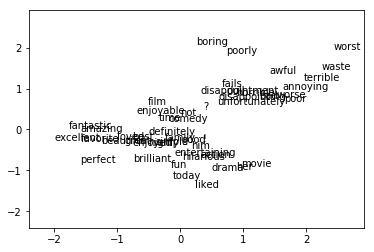

In [18]:
import numpy as np
import matplotlib.pyplot as plt

embedding_matrix = classifier.get_variable_value('dnn/input_from_feature_columns/input_layer/terms_embedding/embedding_weights')

for term_index in range(len(informative_terms)):
    # Create a one-hot encoding for our term. It has 0s everywhere, except for
    # a single 1 in the coordinate that corresponds to that term.
    term_vector = np.zeros(len(informative_terms))
    term_vector[term_index] = 1
    # We'll now project that one-hot vector into the embedding space.
    embedding_xy = np.matmul(term_vector, embedding_matrix)
    plt.text(embedding_xy[0],
           embedding_xy[1],
           informative_terms[term_index])

# Do a little setup to make sure the plot displays nicely.
plt.rcParams["figure.figsize"] = (15, 15)
plt.xlim(1.2 * embedding_matrix.min(), 1.2 * embedding_matrix.max())
plt.ylim(1.2 * embedding_matrix.min(), 1.2 * embedding_matrix.max())
plt.show() 

## Task 6:  Try to improve the model's performance

See if you can refine the model to improve performance. A couple things you may want to try:

* **Changing hyperparameters**, or **using a different optimizer** like Adam (you may only gain one or two accuracy percentage points following these strategies).
* **Adding additional terms to `informative_terms`.** There's a full vocabulary file with all 30,716 terms for this data set that you can use at: https://storage.googleapis.com/mledu-datasets/sparse-data-embedding/terms.txt You can pick out additional terms from this vocabulary file, or use the whole thing via the `categorical_column_with_vocabulary_file` feature column.

In [19]:
# Download the vocabulary file.
terms_url = 'https://storage.googleapis.com/mledu-datasets/sparse-data-embedding/terms.txt'
terms_path = tf.keras.utils.get_file(terms_url.split('/')[-1], terms_url)

253952/253538 [==============================] - 1s 2us/step


In [20]:
# Create a feature column from "terms", using a full vocabulary file.
informative_terms = None
with io.open(terms_path, 'r', encoding='utf8') as f:
  # Convert it to a set first to remove duplicates.
  informative_terms = list(set(f.read().split()))
  
terms_feature_column = tf.feature_column.categorical_column_with_vocabulary_list(key="terms", 
                                                                                 vocabulary_list=informative_terms)

terms_embedding_column = tf.feature_column.embedding_column(terms_feature_column, dimension=2)
feature_columns = [ terms_embedding_column ]

my_optimizer = tf.train.AdagradOptimizer(learning_rate=0.1)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

classifier = tf.estimator.DNNClassifier(
  feature_columns=feature_columns,
  hidden_units=[10,10],
  optimizer=my_optimizer
)

classifier.train(
  input_fn=lambda: _input_fn([train_path]),
  steps=1000)

evaluation_metrics = classifier.evaluate(
  input_fn=lambda: _input_fn([train_path]),
  steps=1000)
print("Training set metrics:")
for m in evaluation_metrics:
  print(m, evaluation_metrics[m])
print("---")

evaluation_metrics = classifier.evaluate(
  input_fn=lambda: _input_fn([test_path]),
  steps=1000)

print("Test set metrics:")
for m in evaluation_metrics:
  print(m, evaluation_metrics[m])
print("---")

Training set metrics:
accuracy 0.77248
accuracy_baseline 0.5
auc 0.8474759
auc_precision_recall 0.84290093
average_loss 0.48632672
label/mean 0.5
loss 12.158168
precision 0.771481
prediction/mean 0.50158817
recall 0.77432
global_step 1000
---
Test set metrics:
accuracy 0.76188
accuracy_baseline 0.5
auc 0.84112865
auc_precision_recall 0.8348567
average_loss 0.49450433
label/mean 0.5
loss 12.362608
precision 0.76223665
prediction/mean 0.5015396
recall 0.7612
global_step 1000
---


## A Final Word

We may have gotten a DNN solution with an embedding that was better than our original linear model, but the linear model was also pretty good and was quite a bit faster to train. Linear models train more quickly because they do not have nearly as many parameters to update or layers to backprop through.

In some applications, the speed of linear models may be a game changer, or linear models may be perfectly sufficient from a quality standpoint. In other areas, the additional model complexity and capacity provided by DNNs might be more important. When defining your model architecture, remember to explore your problem sufficiently so that you know which space you're in.